In [2]:
#Import ze libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#get data
data = pd.read_csv('kyphosis.csv')
#explore it
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


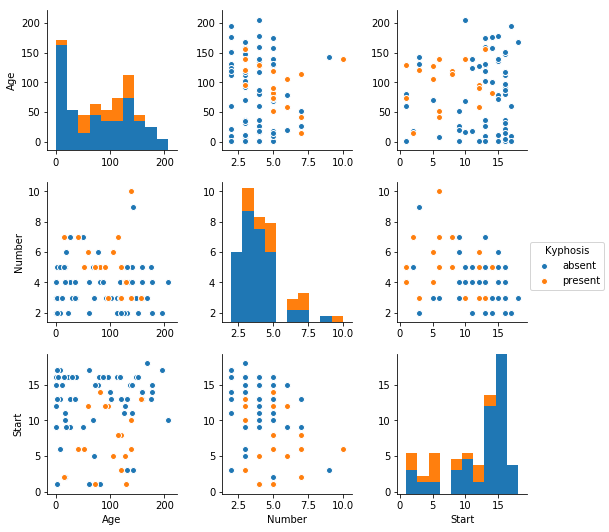

In [6]:
#visualize data
sns.pairplot(data, hue ='Kyphosis')

In [33]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']
#split ze data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
#creata a tree for visualization purposes
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Tree Visualization
Scikit learn actually has built-in visualization capabilities for decision trees, it requires you to install the pydot and graphviz libraries, but here is an example of what it looks like and the code to execute this:

In [35]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

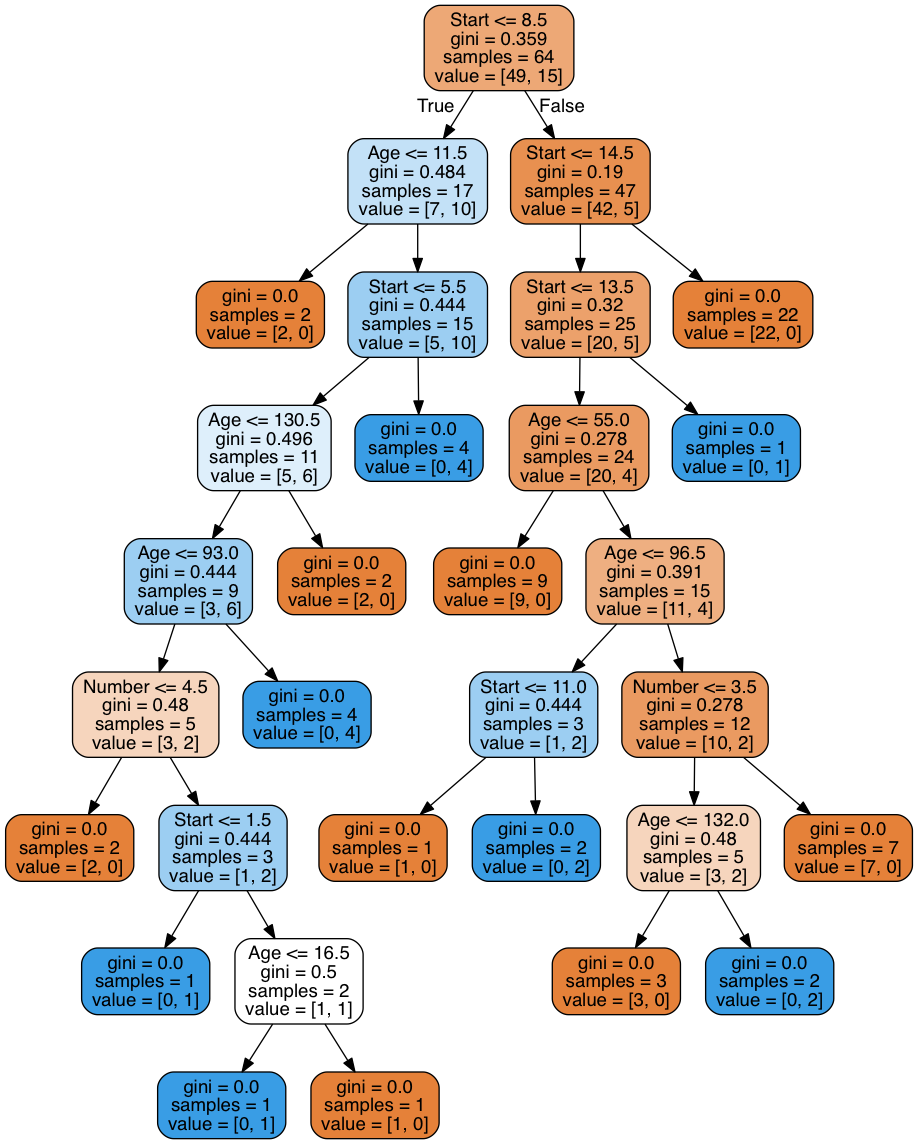

In [21]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [36]:
#now lets check out what team of such trees can do, or Random Forest
from sklearn.ensemble import RandomForestClassifier
#n estimators is # of trees, normally the more the better
forest = RandomForestClassifier(n_estimators=100)
#fit on training set
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

In [37]:
#check out how well our decision tree did
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  0]
 [ 6  2]]
             precision    recall  f1-score   support

     absent       0.74      1.00      0.85        17
    present       1.00      0.25      0.40         8

avg / total       0.82      0.76      0.71        25



In [38]:
#Could be better, perhaps not the best classifier, but data as well is not excellent
# random forest works well as first hit guage to whats the baseline level accuracy for our data